# Lab 6 - Frequencies and Fourier series

### Name: 
### Lab section:

In [1]:
##Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.integrate import odeint

### Assignment Overview:


In this lab we will use the Fast Fourier Transform to performwhat is called *spectral analysis* (just a little late for Halloween). In short, spectral analysis is concerned with decomposing a time series by expanding it in terms o the basis set of sines and cosinesm, which means transforming the time series (often called a signal) from the time domain into the frequency domain. Once in the frequency domain, we can then see what  frequencies make up the signal. Our ability to do this comes from Fourier series and the fact that any signal can be represented by an infinite sum of sines and cosines (or complex exponentials), which you've seen in class. However, we cannot compute infinite series, so most real world analysis turns to the *discrete Fourier transform*.

In this lab, you will learn about numpy's FFT function, how to use it to make power spectral density plots, and then investigate some data. 



**Part 1: Coupled oscillators**

As we saw, the following system of second-order ODEs represets two coupled oscillators, with x and y representing the displacements of two unit masses tethered to an immovable object with spring constant k and coupled together with a spring with constant kc.

$$   d^2x/dt^2 = -kx-kc(x-y) \\
d^2y/dt^2 = -ky-kc(y-x)$$

Covert these two second order ODEs into 4 first-order ODEs by adding two new variables for velocities and modify the code from last week's assignment for solving harmonic oscillator ODEs to reflect this change. **Hint: Pay attention to the order of the variables returned by the function used in the ODE solver (that was called fun in the sample code) - they should match the order of the equations in the system of ODEs.**

**Q1.1:** Set k=0 and kc=2 and calculate the eigenvalues and eigenvectors (normal modes) of the matrix for the two second-order ODEs. Based on this, predict the frequencies of the oscillation of the normal modes.

In [ ]:
#your code goes here

(your written answer goes here)

**Q1.2:** Set some initial values, solve the ODEs and plot the solutions of the displacements of the two masses over time. Describe the dynamics and note how many frequencies are visible in the plots. Choose initial values for positions that correspond to the first normal mode while keeping both velocity variables at 0 and solve the ODE. Explain your result in terms of the eigenvalue of the first normal mode. Choose the initial values for positions that correspond to the second normal mode, keeping the velocity variables at 0 and solve the ODE. Explain your result in terms of the eigenvalue of the second normal mode. 

In [ ]:
#your code goes here

(your written answer goes here)

**Q1.3:** Set k=9 and kc=2 and calculate the eigenvalues and eigenvectors of the matrix for the two second-order ODEs. Based on this, predict the frequencies of the oscillation of the normal modes.

In [ ]:
#your code goes here

(your written answer goes here)

**Q1.4:** Set some initial values, solve the ODEs and plot the solutions of the displacements of the two masses over time. Describe the dynamics and note how many frequencies are visible in the plots. Choose initial values for positions that correspond to the first normal mode while keeping both velocity variables at 0 and solve the ODE. Explain your result in terms of the eigenvalue of the first normal mode. Choose the initial values for positions that correspond to the second normal mode, keeping the velocity variables at 0 and solve the ODE.  Explain your result in terms of the eigenvalue of the second normal mode.

In [ ]:
#your code goes here

(your written answer goes here)

### Part 2: Discrete FFT and signal analysis

The IEEE has called the Fast Fourier Transform (FFT) one of the most important algorithms developed in the 20th century. It is important to note that the FFT is an algorithm that we use to perform a discreteFourier transform (DFT), although they are sometimes used interchangeably.

The script below generates a data set composed of a sum of two periodic signals with different frequencies, ff1 and ff2 and corresponding weight w1 and w2. The fake signal is then generated with a certain sampling rate Fs, which defines the time array on which the "data" were collected. The sampling rate specifies the upper bound of the frequency that can be detected, which is called the Nyquist-Shannon frequency and is equal to half of the sampling frequency.

The script runs the fft function on the signal and returns an array of complex Fourier coeffients, from which we then computed the *power spectrum* of the signal, which is the absolute value of the square coefficients. The power spectrum is plotted against the frequency vector, showing the composition of the signal in terms of different frequencies. The peaks show the frequencies that we put into our generated fake signal, are you are invited to try varying the frequencies and their weights and to see what happens, especially when a frequency is set above the Nyquist-Shannon threshold.


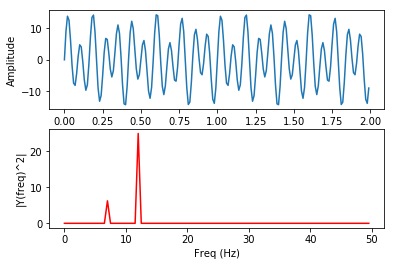

In [12]:
Fs = 100.0  # sampling rate
Ts = 1.0/Fs # sampling interval
Max_time = 2.0 # duration of the signal
t = np.arange(0,Max_time,Ts) # time vector

# generate a signal with different frequencies
ff1 = 12   # frequency 1 of the signal
ff2 = 7   # frequency 2 of the signal
w1 = 10 # weight of frequency 1
w2 = 5 # weight of frequency 2
fake_signal = w1*np.sin(2*np.pi*ff1*t)+ w2*np.sin(2*np.pi*ff2*t)

# frequency stuff
n = len(fake_signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/Max_time  # two sides frequency range
num_freq = np.arange(np.ceil(n/2).astype(int)) # number of frequencies
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(fake_signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,fake_signal)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

**Q2.1:** Run your code from part 1 of this assignmentfor untethered oscillators (k=0 and kc=100) for the duration of 10 time units and save the position data for the first mass (since they are symmetric, the second mass will look the same). Again, determine the sampling frequency of the data set and plot the power frequency spectrum. Report the peak frequencies you observe in the power spectrum, and comment on their correspondence to your frequency analysis from part 1.  

In [13]:
#your code goes here

(your written answer goes here)

 **Q2.2:** Run your code from part 1 of this assignment for tethered oscillators (k=25 and kc=100) for the duration of 10 time units and save the position data for the first mass (since they are symmetric, the second mass will look the same). Determine the sampling frequency of the data set and plot the power frequency spectrum. Report the peak frequencies you observe in the power spectrum, and comment on their correspondence to your frequency analysis from part 1.

(your written answer goes here)

### Rubric:

**Part 1:** 
2 pts for questions 1 and 3
5 pts for questions 2 and 4

**Part 2:** 
5 pts per question

**Total: 24 pts**